In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from sklearn.naive_bayes import CategoricalNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
sal_train=pd.read_csv("SalaryData_Train.csv")
sal_test=pd.read_csv("SalaryData_Test.csv")

In [3]:
frames = [sal_train,sal_test]
  
combinedframes = pd.concat(frames)
display(combinedframes)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
combinedframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
combinedframes_cleaned=combinedframes.drop('educationno',axis=1) # Droping the column
combinedframes_cleaned

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
combinedframes_cleaned['native']= combinedframes_cleaned['native'].astype('category') # will convert column to category
combinedframes_cleaned['native']= combinedframes_cleaned['native'].cat.codes # Encoding the column
combinedframes_cleaned['Salary']= combinedframes_cleaned['Salary'].astype('category') # will convert column to category
combinedframes_cleaned['Salary']= combinedframes_cleaned['Salary'].cat.codes # Encoding the column

In [8]:
for i in combinedframes_cleaned.columns[1:8]:
    combinedframes_cleaned[i]=combinedframes_cleaned[i].astype('category')
    combinedframes_cleaned[i]=combinedframes_cleaned[i].cat.codes

In [9]:
combinedframes_cleaned

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,2,3,0,4,1,0,0,13,37,0
2,38,2,11,0,5,1,4,1,0,0,40,37,0
3,53,2,1,2,5,0,2,1,0,0,40,37,0
4,28,2,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,0,0,3,1,1,5455,0,40,37,0


<AxesSubplot:>

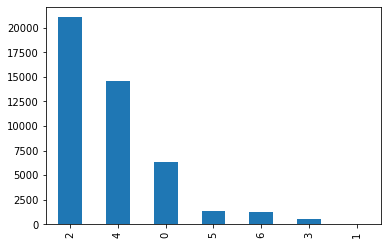

In [10]:
combinedframes_cleaned.maritalstatus.value_counts().plot(kind='bar')

<AxesSubplot:>

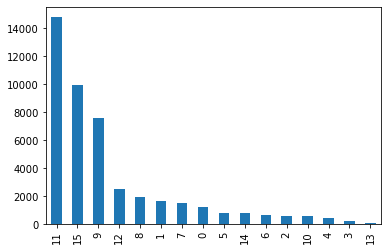

In [11]:
combinedframes_cleaned.education.value_counts().plot(kind='bar')

In [12]:
combinedframes_cleaned.occupation.value_counts()

2     6020
9     6008
3     5984
0     5540
11    5408
7     4808
6     2969
13    2316
5     2046
4     1480
12    1420
10     976
8      232
1       14
Name: occupation, dtype: int64

<AxesSubplot:>

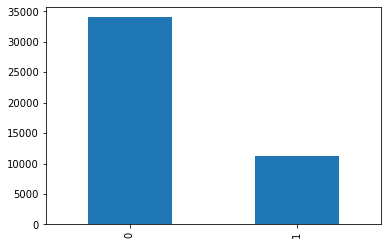

In [13]:
combinedframes_cleaned.Salary.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Salary', ylabel='education'>

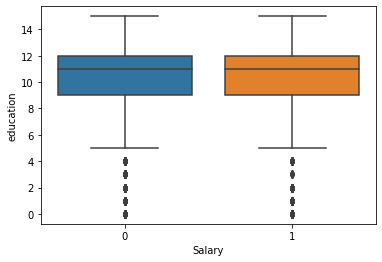

In [14]:
sns.boxplot(combinedframes_cleaned.Salary,combinedframes_cleaned.education)

<AxesSubplot:xlabel='Salary', ylabel='occupation'>

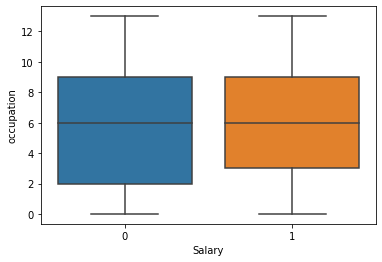

In [15]:
sns.boxplot(combinedframes_cleaned.Salary,combinedframes_cleaned.occupation)

In [16]:
X=combinedframes_cleaned.iloc[:,:-1]
Y=combinedframes_cleaned.iloc[:,-1]

In [17]:
combinedframes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int8 
 2   education      45221 non-null  int8 
 3   maritalstatus  45221 non-null  int8 
 4   occupation     45221 non-null  int8 
 5   relationship   45221 non-null  int8 
 6   race           45221 non-null  int8 
 7   sex            45221 non-null  int8 
 8   capitalgain    45221 non-null  int64
 9   capitalloss    45221 non-null  int64
 10  hoursperweek   45221 non-null  int64
 11  native         45221 non-null  int8 
 12  Salary         45221 non-null  int8 
dtypes: int64(4), int8(9)
memory usage: 3.1 MB


In [18]:
X_train, X_test, y_train, y_test = train_test_split(combinedframes_cleaned.iloc[:,:-1],combinedframes_cleaned.iloc[:,-1] ,test_size=0.3, shuffle=True)

In [19]:
clf=CategoricalNB()
clf=clf.fit(X,Y)

In [20]:
y_test_pred=clf.predict(X_test)

In [21]:
metrics.accuracy_score(y_test,y_test_pred)

0.8522149332940223

## Based on the above analysis we can say that most of the observation in our dataset belong to people which earn less than 50K, out of which majority of them is married. Only 10K people earn more than 50k, as we can see most of the people are having highest education as HS-grad.